<a href="https://colab.research.google.com/github/HuyNguyen271/Bai_tap_tuan_01/blob/main/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=75c34a2dfb5a04d4341f4b8bb642ebe91cf2f2c429fe97d83b349086a0820fad
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


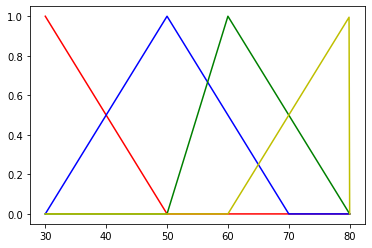

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80.1,0.1)
#hinh tam giac
slow=fuzz.trimf(x,[30,30,50])
medium=fuzz.trimf(x,[30,50,70])
medium_last=fuzz.trimf(x,[50,60,80])
ful_speed=fuzz.trimf(x,[60,80,80])

#hinh thang
# slow=fuzz.trapmf(x,[30,30,30,50])
# medium=fuzz.trapmf(x,[30,50,50,70])
# medium_last=fuzz.trapmf(x,[50,60,60,80])
# ful_speed=fuzz.trapmf(x,[60,80,80,80])

#gaussmf
# slow=fuzz.gaussmf(x,30,5)
# medium=fuzz.gaussmf(x,50,5)
# medium_last=fuzz.gaussmf(x,60,5)
# ful_speed=fuzz.gaussmf(x,80,5)

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'b',linewidth=1.5,label='Medium')
plt.plot(x,medium_last,'g',linewidth=1.5,label='Medium_last')
plt.plot(x,ful_speed,'y',linewidth=1.5,label='Ful_speed')

plt.show()

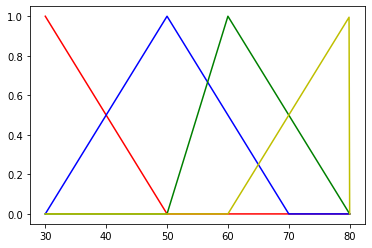

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80.1,0.1)


#hinh thang
slow=fuzz.trapmf(x,[30,30,30,50])
medium=fuzz.trapmf(x,[30,50,50,70])
medium_last=fuzz.trapmf(x,[50,60,60,80])
ful_speed=fuzz.trapmf(x,[60,80,80,80])


plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'b',linewidth=1.5,label='Medium')
plt.plot(x,medium_last,'g',linewidth=1.5,label='Medium_last')
plt.plot(x,ful_speed,'y',linewidth=1.5,label='Ful_speed')

plt.show()

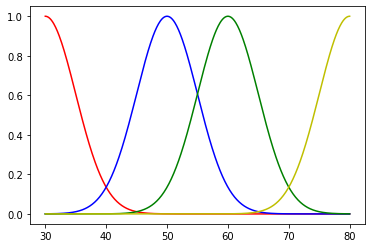

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80.1,0.1)


#gaussmf
slow=fuzz.gaussmf(x,30,5)
medium=fuzz.gaussmf(x,50,5)
medium_last=fuzz.gaussmf(x,60,5)
ful_speed=fuzz.gaussmf(x,80,5)

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'b',linewidth=1.5,label='Medium')
plt.plot(x,medium_last,'g',linewidth=1.5,label='Medium_last')
plt.plot(x,ful_speed,'y',linewidth=1.5,label='Ful_speed')

plt.show()

21.756097560975608


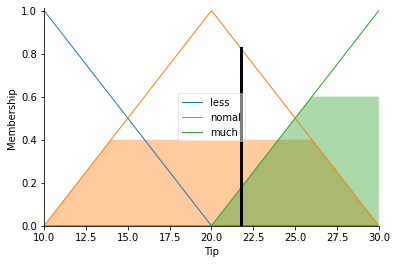

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
# Tao khoang data
food = ctrl.Antecedent(np.arange(0,11,1),'Food') # input khoang dau vao
service = ctrl.Antecedent(np.arange(0,11,1),'Service')
tip = ctrl.Consequent(np.arange(10,31,1),'Tip') # output khoang dau ra




#Food
food['poor']=fuzz.trimf(food.universe,[0,0,5])      
food['avevage']=fuzz.trimf(food.universe,[0,5,10])   #tam giac
food['good']=fuzz.trimf(food.universe,[5,10,10])

#service
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['avevage']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

#service
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['nomal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])

rule1 =ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2 =ctrl.Rule(food['poor'] & service['avevage'],tip['less']) # tao luat
rule3 =ctrl.Rule(food['poor'] & service['good'],tip['nomal'])

rule4 =ctrl.Rule(food['avevage'] & service['poor'],tip['less'])
rule5 =ctrl.Rule(food['avevage'] & service['avevage'],tip['nomal'])
rule6 =ctrl.Rule(food['avevage'] & service['good'],tip['much'])

rule7 =ctrl.Rule(food['good'] & service['poor'],tip['nomal'])
rule8 =ctrl.Rule(food['good'] & service['avevage'],tip['much'])
rule9 =ctrl.Rule(food['good'] & service['good'],tip['much'])

tiping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9]) # dua vao 
tipping = ctrl.ControlSystemSimulation(tiping_ctrl)
#input data
tipping.input['Food'] = 8
tipping.input['Service'] = 7

tipping.compute()

print(tipping.output['Tip'])
tip.view(sim=tipping)

# food.view()
# service.view()
# tip.view()

# food['poor'].view()





40.7843137254902


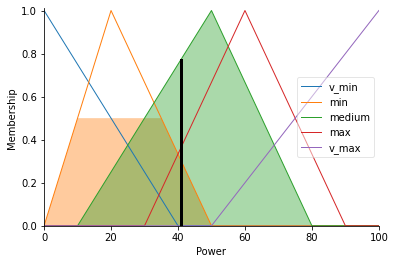

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
# Tao khoang data
time = ctrl.Antecedent(np.arange(10,181,1),'Time') # input khoang dau vao
rice = ctrl.Antecedent(np.arange(200,2001,1),'Rice')
power = ctrl.Consequent(np.arange(0,101,1),'Power') # output khoang dau ra




#Time
time['v_fast']=fuzz.trimf(time.universe,[10,10,30])  
time['fast']=fuzz.trimf(time.universe,[10,30,60])  
time['nomal']=fuzz.trimf(time.universe,[30,60,90])  
time['slow']=fuzz.trimf(time.universe,[60,100,150])  
time['v_slow']=fuzz.trimf(time.universe,[90,180,180])      


#rice 
rice['v_less']=fuzz.trimf(rice.universe,[200,200,1000])
rice['less']=fuzz.trimf(rice.universe,[200,500,1500])
rice['nomal']=fuzz.trimf(rice.universe,[500,1000,2000])
rice['much']=fuzz.trimf(rice.universe,[1000,1500,2000])
rice['v_much']=fuzz.trimf(rice.universe,[1500,2000,2000])

#power
power['v_min']=fuzz.trimf(power.universe,[0,0,40])
power['min']=fuzz.trimf(power.universe,[0,20,50])
power['medium']=fuzz.trimf(power.universe,[10,50,80])
power['max']=fuzz.trimf(power.universe,[30,60,90])
power['v_max']=fuzz.trimf(power.universe,[50,100,100])

# tao luat
rule1 =ctrl.Rule(time['v_fast'] & rice['v_less'],power['medium'])
rule2 =ctrl.Rule(time['v_fast'] & rice['less'],power['medium'])
rule3 =ctrl.Rule(time['v_fast'] & rice['nomal'],power['max'])
rule4 =ctrl.Rule(time['v_fast'] & rice['much'],power['v_max'])
rule5 =ctrl.Rule(time['v_fast'] & rice['v_much'],power['v_max']) 

rule6 =ctrl.Rule(time['fast'] & rice['v_less'],power['min'])
rule7 =ctrl.Rule(time['fast'] & rice['less'],power['medium'])
rule8 =ctrl.Rule(time['fast'] & rice['nomal'],power['max'])
rule9 =ctrl.Rule(time['fast'] & rice['much'],power['max'])
rule10 =ctrl.Rule(time['fast'] & rice['v_much'],power['v_max']) 

rule11 =ctrl.Rule(time['nomal'] & rice['v_less'],power['min'])
rule12 =ctrl.Rule(time['nomal'] & rice['less'],power['min'])
rule13 =ctrl.Rule(time['nomal'] & rice['nomal'],power['medium'])
rule14 =ctrl.Rule(time['nomal'] & rice['much'],power['max'])
rule15 =ctrl.Rule(time['nomal'] & rice['v_much'],power['max']) 

rule16 =ctrl.Rule(time['slow'] & rice['v_less'],power['v_min'])
rule17 =ctrl.Rule(time['slow'] & rice['less'],power['v_min'])
rule18 =ctrl.Rule(time['slow'] & rice['nomal'],power['min'])
rule19 =ctrl.Rule(time['slow'] & rice['much'],power['medium'])
rule20 =ctrl.Rule(time['slow'] & rice['v_much'],power['max']) 

rule21 =ctrl.Rule(time['v_slow'] & rice['v_less'],power['v_min'])
rule22 =ctrl.Rule(time['v_slow'] & rice['less'],power['v_min'])
rule23 =ctrl.Rule(time['v_slow'] & rice['nomal'],power['min'])
rule24 =ctrl.Rule(time['v_slow'] & rice['much'],power['medium'])
rule25 =ctrl.Rule(time['v_slow'] & rice['v_much'],power['medium']) 


tiping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25]) # dua vao 
tipping = ctrl.ControlSystemSimulation(tiping_ctrl) # mo phong
#input data
tipping.input['Time'] = 60
tipping.input['Rice'] = 1000

tipping.compute()

print(tipping.output['Power']) #in ra
power.view(sim=tipping) # view maps

# time.view()
# rice.view()
# tip.view()

# food['poor'].view()